# Preprocessing

## 1. Imports

### 1.1 Libraries

In [9]:
# builtin
import os, time, sys, random
from dotenv import load_dotenv
from pathlib import Path
from datetime import date

# data
import pandas as pd
import numpy as np
import requests
import math

# viz
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLP
import string
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.corpus import RegexpTokenizer
from nltk.stem.snowball import FrenchStemmer
from collections import Counter
import spacy

# ML
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import scipy.sparse as sp

# other
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### 1.2 Download and options

In [10]:
nltk.download('stopwords')
nltk.download('wordpunct')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Melvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading wordpunct: Package 'wordpunct' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Melvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Melvin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Melvin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
sns.set()

BASE_DIR = Path().resolve().parent
DATA_DIR = BASE_DIR / 'data'

print(f"Répertoire de sauvegarde: {DATA_DIR}\n")

today = date.today()
print("Date du jour :", today)

Répertoire de sauvegarde: C:\Users\Melvin\Desktop\DATA\PORTFOLIO\Recommandation de films\data

Date du jour : 2026-02-10


### 1.3 Loading data

In [12]:
df = pd.read_csv(BASE_DIR / 'data' / 'df_movies_cleaned.csv')

## Variable "Synopsis"

### 2. Work on a specific document

In [13]:
# Fonction de saut de ligne pour output
def insert_newlines(string, every=80):
    lines = []
    for i in range(0, len(string), every):
        lines.append(string[i:i+every])
    return '\n'.join(lines)

In [14]:
doc = df.Synopsis.sample(1)
doc = doc.values[0]
print(insert_newlines(doc, every=200))

Durant la guerre de Sécession, dans le Missouri, la ferme de Josey Wales est brûlée par les « Red Legs », une brigade particulièrement violente de l'armée nordiste, commandée par le capitaine Terrill.
 La femme et le fils de Josey Wales périssent dans l'affrontement. Laissé pour mort, le fermier survit à ses blessures. Après avoir enterré les siens, il rejoint les rangs sudistes pour assouvir sa ve
ngeance et combat sous les ordres de Fletcher, surnommé « Bloody Bill Anderson ». La bande poursuit la lutte après la reddition du Sud. Fletcher finit par demander à ses hommes de se rendre. Tous acce
ptent sauf Josey Wales, devenu célèbre pour ses nombreux faits d'armes. Il massacre ses anciens amis, coupables de fléchissement, avant de partir vers l'Ouest...


### 2.1 Lower

In [15]:
doc = doc.lower()

In [16]:
print(insert_newlines(doc, every=200))

durant la guerre de sécession, dans le missouri, la ferme de josey wales est brûlée par les « red legs », une brigade particulièrement violente de l'armée nordiste, commandée par le capitaine terrill.
 la femme et le fils de josey wales périssent dans l'affrontement. laissé pour mort, le fermier survit à ses blessures. après avoir enterré les siens, il rejoint les rangs sudistes pour assouvir sa ve
ngeance et combat sous les ordres de fletcher, surnommé « bloody bill anderson ». la bande poursuit la lutte après la reddition du sud. fletcher finit par demander à ses hommes de se rendre. tous acce
ptent sauf josey wales, devenu célèbre pour ses nombreux faits d'armes. il massacre ses anciens amis, coupables de fléchissement, avant de partir vers l'ouest...


### 2.2 Tokenization

In [17]:
tokens = word_tokenize(doc)
tokens

['durant',
 'la',
 'guerre',
 'de',
 'sécession',
 ',',
 'dans',
 'le',
 'missouri',
 ',',
 'la',
 'ferme',
 'de',
 'josey',
 'wales',
 'est',
 'brûlée',
 'par',
 'les',
 '«',
 'red',
 'legs',
 '»',
 ',',
 'une',
 'brigade',
 'particulièrement',
 'violente',
 'de',
 "l'armée",
 'nordiste',
 ',',
 'commandée',
 'par',
 'le',
 'capitaine',
 'terrill',
 '.',
 'la',
 'femme',
 'et',
 'le',
 'fils',
 'de',
 'josey',
 'wales',
 'périssent',
 'dans',
 "l'affrontement",
 '.',
 'laissé',
 'pour',
 'mort',
 ',',
 'le',
 'fermier',
 'survit',
 'à',
 'ses',
 'blessures',
 '.',
 'après',
 'avoir',
 'enterré',
 'les',
 'siens',
 ',',
 'il',
 'rejoint',
 'les',
 'rangs',
 'sudistes',
 'pour',
 'assouvir',
 'sa',
 'vengeance',
 'et',
 'combat',
 'sous',
 'les',
 'ordres',
 'de',
 'fletcher',
 ',',
 'surnommé',
 '«',
 'bloody',
 'bill',
 'anderson',
 '»',
 '.',
 'la',
 'bande',
 'poursuit',
 'la',
 'lutte',
 'après',
 'la',
 'reddition',
 'du',
 'sud',
 '.',
 'fletcher',
 'finit',
 'par',
 'demander',


In [18]:
# longueur de la liste
len(tokens)

143

In [19]:
# longueur de la liste (sans les doublons)
len(set(tokens))

91

In [20]:
def display_tokens_infos(tokens):
    """display info about corpus"""

    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

In [21]:
tokens = wordpunct_tokenize(doc)
display_tokens_infos(tokens)

nb tokens 149, nb tokens uniques 95
['durant', 'la', 'guerre', 'de', 'sécession', ',', 'dans', 'le', 'missouri', ',', 'la', 'ferme', 'de', 'josey', 'wales', 'est', 'brûlée', 'par', 'les', '«', 'red', 'legs', '»,', 'une', 'brigade', 'particulièrement', 'violente', 'de', 'l', "'"]


### 2.3 Stopwords

In [22]:
stop_words = set(stopwords.words('french'))

In [23]:
tokens = [w for w in tokens if w not in stop_words]
display_tokens_infos(tokens)

nb tokens 100, nb tokens uniques 77
['durant', 'guerre', 'sécession', ',', 'missouri', ',', 'ferme', 'josey', 'wales', 'brûlée', '«', 'red', 'legs', '»,', 'brigade', 'particulièrement', 'violente', "'", 'armée', 'nordiste', ',', 'commandée', 'capitaine', 'terrill', '.', 'femme', 'fils', 'josey', 'wales', 'périssent']


In [24]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(doc)
display_tokens_infos(tokens)

nb tokens 125, nb tokens uniques 88
['durant', 'la', 'guerre', 'de', 'sécession', 'dans', 'le', 'missouri', 'la', 'ferme', 'de', 'josey', 'wales', 'est', 'brûlée', 'par', 'les', 'red', 'legs', 'une', 'brigade', 'particulièrement', 'violente', 'de', 'l', 'armée', 'nordiste', 'commandée', 'par', 'le']


In [25]:
tokens = [w for w in tokens if w not in stop_words]
display_tokens_infos(tokens)

nb tokens 76, nb tokens uniques 70
['durant', 'guerre', 'sécession', 'missouri', 'ferme', 'josey', 'wales', 'brûlée', 'red', 'legs', 'brigade', 'particulièrement', 'violente', 'armée', 'nordiste', 'commandée', 'capitaine', 'terrill', 'femme', 'fils', 'josey', 'wales', 'périssent', 'affrontement', 'laissé', 'mort', 'fermier', 'survit', 'blessures', 'après']


### 2.4 First cleaning function

In [26]:
def process_synopsis_1(doc, rejoin=False):

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [27]:
tokens = process_synopsis_1(doc)
display_tokens_infos(tokens)

nb tokens 76, nb tokens uniques 70
['durant', 'guerre', 'sécession', 'missouri', 'ferme', 'josey', 'wales', 'brûlée', 'red', 'legs', 'brigade', 'particulièrement', 'violente', 'armée', 'nordiste', 'commandée', 'capitaine', 'terrill', 'femme', 'fils', 'josey', 'wales', 'périssent', 'affrontement', 'laissé', 'mort', 'fermier', 'survit', 'blessures', 'après']


## 3. Work on the entire corpus

### 3.1 Build raw corpus

In [28]:
raw_corpus = "".join(df.Synopsis.values)
raw_corpus[:3_00]

"Après l'impact dévastateur d'une comète qui a réduit la Terre en ruines, la famille Garrity doit quitter la sécurité de son bunker au Groenland. Commence alors un périple pour leur survie et l'avenir de l'Humanité à travers un monde dévasté à la recherche d'un nouveau foyer.En quête d’un nouveau dép"

In [29]:
len(raw_corpus)

2419538

In [30]:
corpus = process_synopsis_1(raw_corpus)
display_tokens_infos(corpus)

nb tokens 238572, nb tokens uniques 30320
['après', 'impact', 'dévastateur', 'comète', 'a', 'réduit', 'terre', 'ruines', 'famille', 'garrity', 'doit', 'quitter', 'sécurité', 'bunker', 'groenland', 'commence', 'alors', 'périple', 'survie', 'avenir', 'humanité', 'travers', 'monde', 'dévasté', 'recherche', 'nouveau', 'foyer', 'quête', 'nouveau', 'départ']


In [31]:
tmp = pd.Series(corpus).value_counts()
tmp

a             2387
plus          1993
jeune         1379
vie           1304
alors         1116
              ... 
revanchard       1
chul             1
mutilée          1
arènes           1
alexia           1
Name: count, Length: 30320, dtype: int64

In [32]:
tmp.head(10)

a        2387
plus     1993
jeune    1379
vie      1304
alors    1116
deux     1067
tout     1005
va        989
après     850
ans       833
Name: count, dtype: int64

In [33]:
tmp.tail(10)

paillard      1
fisc          1
pitreries     1
pelouses      1
tondues       1
revanchard    1
chul          1
mutilée       1
arènes        1
alexia        1
Name: count, dtype: int64

In [34]:
tmp.describe()

count    30320.000000
mean         7.868470
std         37.864155
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       2387.000000
Name: count, dtype: float64

### 3.2 List rare tokens

In [35]:
# unique words = usefull ?

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp==1]
list_unique_words[:20]

immortalise        1
émue               1
sutra              1
numérisés          1
néfaste            1
collectionne       1
conventionnelle    1
affectera          1
allégorie          1
dépouillé          1
artificial         1
rashida            1
morley             1
fallacieux         1
gorges             1
tangible           1
rocketbelt         1
prostate           1
psychologie        1
prédestinée        1
Name: count, dtype: int64

In [36]:
len(list_unique_words)

13680

In [37]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:20]

['immortalise',
 'émue',
 'sutra',
 'numérisés',
 'néfaste',
 'collectionne',
 'conventionnelle',
 'affectera',
 'allégorie',
 'dépouillé',
 'artificial',
 'rashida',
 'morley',
 'fallacieux',
 'gorges',
 'tangible',
 'rocketbelt',
 'prostate',
 'psychologie',
 'prédestinée']

In [38]:
tmp = pd.DataFrame({"words" : list_unique_words})

save_path = DATA_DIR / 'unique_words.csv'
tmp.to_csv(save_path, index=False, encoding='utf-8')

In [39]:
# idem for min 5 times

tmp = pd.Series(corpus).value_counts()
list_min_5_words = tmp[tmp==5]
list_min_5_words[:20]

mick          5
semblait      5
audace        5
ocean         5
matrice       5
movie         5
étonnantes    5
penchant      5
capturée      5
army          5
député        5
vlad          5
kurt          5
jonny         5
igor          5
associent     5
suédois       5
étendue       5
équipes       5
paisibles     5
Name: count, dtype: int64

In [40]:
len(list_min_5_words)

1123

In [41]:
list_min_5_words = list(list_min_5_words.index)
list_min_5_words[:20]

['mick',
 'semblait',
 'audace',
 'ocean',
 'matrice',
 'movie',
 'étonnantes',
 'penchant',
 'capturée',
 'army',
 'député',
 'vlad',
 'kurt',
 'jonny',
 'igor',
 'associent',
 'suédois',
 'étendue',
 'équipes',
 'paisibles']

In [42]:
tmp = pd.DataFrame({"words" : list_min_5_words})

save_path = DATA_DIR / 'min_5_words.csv'
tmp.to_csv(save_path, index=False, encoding='utf-8')

### 3.3 Second cleaning function

In [43]:
def process_synopsis_2(doc,
                       rejoin=False,
                       list_rare_words=None,
                       min_len_word=2,
                       force_is_alpha="alpha") : 
    
    """cf process_synopsis_1 but with list_unique_words, min_len_word, and force_is_alpha

    positionnal arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process

    opt args : 
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    list_rare_words : list : a list of rare words to exclude
    min_len_word : int : minimum lenght of a word to not exclude
    force_is_alpha : if 1, exclude all tokens with a numeric character

    return : 
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    # list unique words
    if not list_rare_words:
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    #############################################################
    #############################################################

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha == "alpha":
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    elif force_is_alpha == "digits4":
        alpha_tokens = [w for w in more_than_N if re.fullmatch(r'\d{4}', w)]
    else:
        alpha_tokens = more_than_N

    #############################################################
    #############################################################

    # manage return type
    if rejoin : 
        return " ".join(alpha_tokens)
    
    return alpha_tokens

In [44]:
display_tokens_infos(corpus)

nb tokens 238572, nb tokens uniques 30320
['après', 'impact', 'dévastateur', 'comète', 'a', 'réduit', 'terre', 'ruines', 'famille', 'garrity', 'doit', 'quitter', 'sécurité', 'bunker', 'groenland', 'commence', 'alors', 'périple', 'survie', 'avenir', 'humanité', 'travers', 'monde', 'dévasté', 'recherche', 'nouveau', 'foyer', 'quête', 'nouveau', 'départ']


In [45]:
len(set(corpus))

30320

In [46]:
corpus = process_synopsis_2(raw_corpus,
                            list_rare_words=list_unique_words,
                            rejoin=False)
display_tokens_infos(corpus)

nb tokens 220573, nb tokens uniques 16401
['après', 'impact', 'dévastateur', 'comète', 'réduit', 'terre', 'ruines', 'famille', 'garrity', 'doit', 'quitter', 'sécurité', 'bunker', 'groenland', 'commence', 'alors', 'périple', 'survie', 'avenir', 'humanité', 'travers', 'monde', 'dévasté', 'recherche', 'nouveau', 'foyer', 'quête', 'nouveau', 'départ', 'millie']


In [47]:
len(set(corpus))

16401

### 3.4 Stemming & Lemmatize

In [48]:
#test fonction stemming

def process_synopsis_3(doc,
                       rejoin=False,
                       list_rare_words=None,
                       min_len_word=2,
                       force_is_alpha="alpha",
                       lemm_or_stemm="stemm") : 
    
    """cf process_synopsis_1 but with list_unique_words, min_len_word, and force_is_alpha

    positionnal arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process

    opt args : 
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    list_rare_words : list : a list of rare words to exclude
    min_len_word : int : minimum lenght of a word to not exclude
    force_is_alpha : if 1, exclude all tokens with a numeric character

    return : 
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    # list unique words
    if not list_rare_words:
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    #############################################################
    #############################################################

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha == "alpha":
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    elif force_is_alpha == "digits4":
        alpha_tokens = [w for w in more_than_N if re.fullmatch(r'\d{4}', w)]
    else:
        alpha_tokens = more_than_N

    #############################################################
    #############################################################

    # stem or lem
    lem = spacy.load("fr_core_news_md")
    lem.max_length = 3000000
    if lemm_or_stemm == "lem" : 
        trans = lem(' '.join(alpha_tokens))
        trans_text = [token.lemma_ for token in trans]
    else : 
        trans = FrenchStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]

    #############################################################
    #############################################################

    # manage return type
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [49]:
#test fonction lemmatize

# def process_synopsis_3(doc,
#                        rejoin=False,
#                        lemm_or_stemm="lem",
#                        list_rare_words=None,
#                        min_len_word=3,
#                        force_is_alpha=True) : 
    
    
#     # list unique words
#     if not list_rare_words:
#         list_rare_words = []

#     # lower
#     doc = doc.lower().strip()

#     # tokenize
#     tokenizer = RegexpTokenizer(r'\w+')
#     raw_tokens_list = tokenizer.tokenize(doc)

#     # stop words
#     cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

#     # no rare tokens
#     non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

#     # no more len words
#     more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

#     # only alpha chars
#     if force_is_alpha : 
#         alpha_tokens = [w for w in more_than_N if w.isalpha()]
#     else : 
#         alpha_tokens = more_than_N

#     #############################################################
#     #############################################################

#     # stem or lem
#     if lemm_or_stemm == "lem" : 
#         trans = nlp(' '.join(alpha_tokens))
#         trans_text = [trans.lemma_(i) for i in alpha_tokens]
#     else : 
#         trans = FrenchStemmer()
#         trans_text = [trans.stem(i) for i in alpha_tokens]
#     #############################################################
#     #############################################################

#     # manage return type
#     if rejoin : 
#         return " ".join(trans_text)
    
#     return trans_text

In [50]:
corpus = process_synopsis_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(20)

140788         charm
55872            ken
189083       comport
124488       adulter
73036           veut
148416          lieu
510           loyaut
213672        commun
96790     inspecteur
89841          jacqu
83048           cobr
138500           idé
9684            gagn
108296         block
115192      indépend
214407          viol
181479         décid
102724        destin
37198         vampir
121691        étrang
dtype: object

In [51]:
len(set(corpus))

10478

### 3.5 Wordcloud

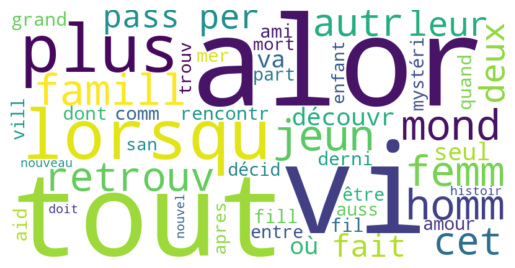

In [52]:
wordcloud = WordCloud(width = 800,
                      height = 400,
                      background_color='white',
                      stopwords=[],
                      max_words=50).generate(" ".join(corpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. Final cleaning function

In [53]:
def final_clean(doc) :

    new_doc = process_synopsis_3(doc,
                                 rejoin=False,
                                 lemm_or_stemm="stemm",
                                 list_rare_words=list_unique_words,
                                 min_len_word=2,
                                 force_is_alpha="alpha")
    return new_doc

In [ ]:
df['clean_synopsis'] = df.Synopsis.apply(final_clean)

In [ ]:
# on reconverti la colonne clean_synopsis_str en chaine de char
df['clean_synopsis_str'] = df['clean_synopsis'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [ ]:
df.head(5)

## 5. Date de sortie to datetime

In [ ]:
df['Date de sortie'] = pd.to_datetime(df['Date de sortie'])

### 5.1 Age of movies

In [ ]:
current_year = datetime.now().year
df['Age du film'] = current_year - df['Date de sortie'].dt.year

## 6. Binary encoding of genres

In [ ]:
print(len(df))
print(df['Genre'].apply(lambda x: isinstance(x, str)).sum())

In [ ]:
df['Genre'] = df['Genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)
print(df['Genre'].apply(lambda x: isinstance(x, list)).sum())

In [ ]:
mlb = MultiLabelBinarizer()
genre_binarized = mlb.fit_transform(df['Genre'])

genre_df = pd.DataFrame(genre_binarized, columns=mlb.classes_)

In [ ]:
genre_df.index = df.index

In [ ]:
df = pd.concat([df.drop('Genre', axis=1), genre_df], axis=1)

# 7. Final df

In [ ]:
# df_final = df.copy()

In [ ]:
df.info()

In [ ]:
# df_final['tags'] = df_final['clean_synopsis_str']+df_final['Genre']

In [ ]:
# del_columns = ['Genre', 'clean_synopsis', 'clean_synopsis_str']

# df_final.drop(columns=del_columns, inplace=True)

In [ ]:
# df_final.columns

In [ ]:
# df_final = df_final[['ID', 'Titre', 'Date de sortie', 'Age du film', 'Note', 'Popularité',
#                      'Synopsis', 'tags', 'Affiche']]

In [ ]:
save_path = DATA_DIR / 'df_movies_preprocess.csv'
df.to_csv(save_path, index=False, encoding='utf-8')

save_path = DATA_DIR / 'genres_binarized.csv'
genre_df.to_csv(save_path, index=False, encoding='utf-8')